In [51]:
import numpy as np
import pandas as pd
import joblib
from os import listdir
from os.path import isfile, join
from commonFunctions import musicFeatureExtraction

#spremenljivke
from commonFunctions import subfolderName
from commonFunctions import showResults
subfolder = subfolderName

onlyfiles = [f for f in listdir(subfolder) if isfile(join(subfolder, f)) and ".mp3" in f]

allFeatures = []
for fileName in onlyfiles:
    print(fileName)
    data = musicFeatureExtraction(subfolder+str(fileName))
    allFeatures.append([fileName, data])

featuresdf = pd.DataFrame(allFeatures, columns=['id','features'])
featuresdf = featuresdf.set_index(['id'])


005.mp3
019.mp3
084.mp3
179.mp3
192.mp3
299.mp3
379.mp3
564.mp3
573.mp3
683.mp3
755.mp3
789.mp3
815.mp3
825.mp3
926.mp3


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[0.67774984 0.36821597 0.73047899 ... 0.73330803 0.17316949 0.62962963]
 [0.91033916 0.38428441 0.59759734 ... 0.78189476 0.29154504 0.53333333]
 [0.68302016 0.31770088 0.56998426 ... 0.77397413 0.40562161 0.62962963]
 ...
 [0.56241529 0.36649127 0.65257983 ... 0.68582403 0.17566026 0.57894737]
 [0.69519543 0.25321146 0.65038013 ... 0.86587502 0.4269568  0.30864198]
 [0.6621697  0.48648017 0.67434609 ... 0.63300819 0.16719299 0.68627451]]
[[0.67774984 0.36821597 0.73047899 ... 0.73330803 0.17316949 0.62962963]
 [0.91033916 0.38428441 0.59759734 ... 0.78189476 0.29154504 0.53333333]
 [0.68302016 0.31770088 0.56998426 ... 0.77397413 0.40562161 0.62962963]
 ...
 [0.56241529 0.36649127 0.65257983 ... 0.68582403 0.17566026 0.57894737]
 [0.69519543 0.25321146 0.65038013 ... 0.86587502 0.4269568  0.30864198]
 [0.6621697  0.48648017 0.67434609 ... 0.63300819 0.16719299 0.68627451]]
MSE: 0.1827 0.2851
MAE: 

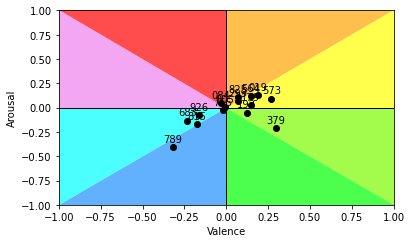

In [67]:
%load_ext autoreload
%autoreload 2
from pickle import load
scaler = load(open('scaler.pkl', 'rb'))

indexesFeatures = 199
regressionType = "RF"
#regressionType = "SVR"
fullType = "FULL"

#selectionType = "corelation"
selectionType = "reliefF"
VA = ['valence', 'arousal']

for selectVA in VA:
    
    if indexesFeatures != 199:
        selectedFeatIds = pd.read_pickle('Dataset/indexes/'+selectionType+'_'+str(indexesFeatures)+'_'+selectVA+'_indexes.pkl')
        indexes = np.array(selectedFeatIds['indexes'].tolist()) # read indexes file
    
    X_pred = np.array(featuresdf['features'].tolist()) # input
    X_pred = scaler.transform(X_pred)
    print(X_pred)
    if indexesFeatures != 199:
        X_pred_filtered = X_pred[:, indexes]# filter features by index
        X_pred = X_pred_filtered
    
    model = joblib.load('./models/'+fullType+'/model'+regressionType+'_'+selectVA+'_'+str(indexesFeatures)+'_'+selectionType+'.joblib')
    predictions = model.predict(X_pred)
    
    if selectVA == 'valence':
        
        
        predictions_valence = predictions
        npValence = np.round(np.array(predictions),2)
    else:
        predictions_arousal = predictions
        npArousal = np.round(np.array(predictions),2)

# od tukaj dol je samo za prikaz !
combined = np.vstack((npValence, npArousal)).T
names = [x.replace('.mp3', '') for x in onlyfiles]
dataValenceArousal = pd.DataFrame(data=combined, index=names, columns=['valence', 'arousal']) 
#print(dataValenceArousal.sort_index())

if showResults:
    from commonFunctions import rezultatiTestData
    rezultatiTestData(predictions_valence, predictions_arousal)

from commonFunctions import displayVAgraph
displayVAgraph(predictions_valence, predictions_arousal, names, -1, 1 )

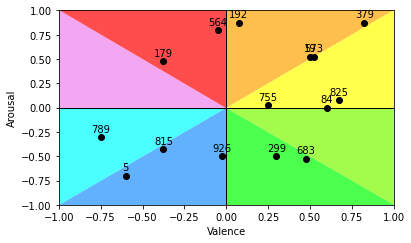

In [36]:
from commonFunctions import parseDEAM
emotions = parseDEAM('./izbrane_15/15_pravilne.csv')
Y_valence = np.array(emotions['valence'].tolist())
Y_arousal = np.array(emotions['arousal'].tolist())

#print(emotions.index.tolist())

displayVAgraph( Y_valence, Y_arousal, emotions.index.tolist(), -1, 1 )